### Expression modulation targets

Since introducing mutations to a strain for improving yield can cause certain drawbacks, regulating the expression of a few selected genes might be more beneficial for productivity. In this section, we focused on the latter solution. To implement this, we used Flux Scanning based on Enforced Objective Flux (FSEOF), to find possible targets for up/down-regulation, which may enhance p-coumaric acid production. The theory behind this method, is that the algorithm scans every flux in a model, and identifies the ones, which increase due to enforced target molecule production (Choi et al., 2010).

In [1]:
import numpy as np

In [2]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite

In [3]:
model = read_sbml_model('iSynCJ816_PCOU_BG11.xml')

In [4]:
model.reactions.EX_photon_e.bounds = 0, 95
model.reactions.RBPC_1.bounds = 2.97, 3.54

In [5]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
fseof = FSEOF(model)
result = fseof.run(target = model.reactions.CYP73A)
df = result.data_frame

After the performed analysis, we plotted the results below. Our plot shows the targets, which increase or decrease in flux.

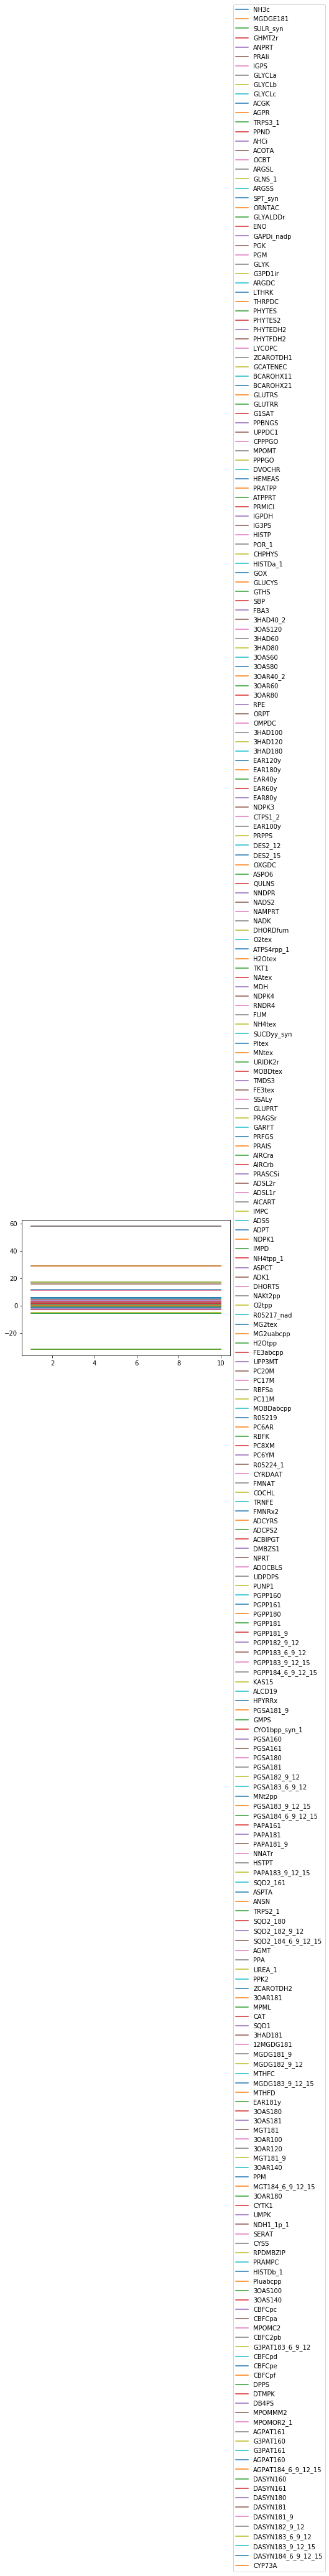

In [6]:
from matplotlib import pyplot as plt
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In order to make the visualization easier, we made a table, in which we removed every reaction, that did not have a change in flux.

In [7]:
# sorting the dataframe
df= df.sort_values([1], ascending = False)
 
from pytest import approx
# removing genes from dataframe 
removed_zero = (df != approx(0.0)).all(axis=1)
df = df.loc[removed_zero]
df

,1,2,3,4,5,6,7,8,9,10
CBFCpa,57.818123,57.818139,57.818155,57.818171,57.818187,57.818203,57.818219,57.818235,57.818251,57.818267
CBFCpc,57.818123,57.818139,57.818155,57.818171,57.818187,57.818203,57.818219,57.818235,57.818251,57.818267
CBFC2pb,57.818123,57.818139,57.818155,57.818171,57.818187,57.818203,57.818219,57.818235,57.818251,57.818267
CBFCpf,28.909062,28.909070,28.909078,28.909086,28.909093,28.909101,28.909109,28.909117,28.909125,28.909133
CBFCpe,28.909062,28.909070,28.909078,28.909086,28.909093,28.909101,28.909109,28.909117,28.909125,28.909133
...,...,...,...,...,...,...,...,...,...,...
G3PD1ir,-5.384581,-5.384584,-5.384586,-5.384588,-5.384591,-5.384593,-5.384596,-5.384598,-5.384601,-5.384603
GLYALDDr,-5.493865,-5.493867,-5.493870,-5.493872,-5.493874,-5.493877,-5.493879,-5.493881,-5.493884,-5.493886
NH3c,-5.577455,-5.577469,-5.577483,-5.577496,-5.577510,-5.577523,-5.577537,-5.577551,-5.577564,-5.577578
H2Otpp,-32.026182,-32.026203,-32.026223,-32.026244,-32.026264,-32.026285,-32.026305,-32.026326,-32.026346,-32.026367


The table above consist of 230 rows, meaning that 230 reactions have a change of flux during enhanced p-coumaric acid production. However, we are mostly interested in the amount of relative changes in the different fluxes. To calculate this, we used the following formula: R = (B-A) / B + 1, where R is the relative change, A is the initial flux and B is the changed flux. Furthermore, we were only interested about those reactions, which had more than 80% relative change in their flux.

In [8]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[10] +1

In [9]:
target_reactions_df = df[df['relative_change_in_flux'] > 1.8]

In [10]:
target_reactions_df

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
NADK,0.000003,0.000005,0.000008,0.000011,0.000014,0.000017,0.000019,0.000022,0.000025,0.000028,1.892857


In [11]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)

Text(0.5,1,'Reactions with a relative change in Flux > 80%')

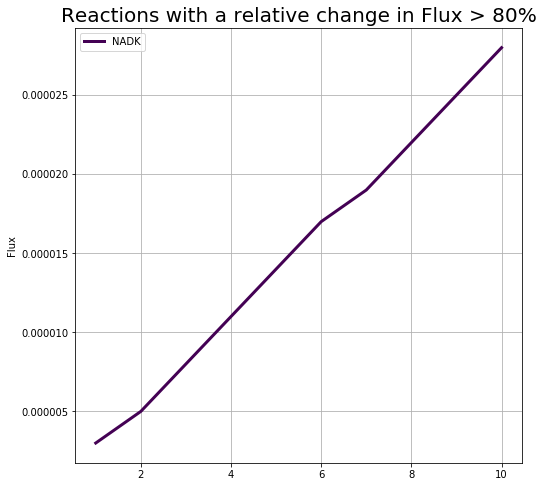

In [12]:
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 80%', size=20)

In [13]:
model.reactions.NADK

Reaction identifier,NADK
Name,NAD kinase
Memory address,0x019a8a79ae80
Stoichiometry,atp_c + nad_c --> adp_c + h_c + nadp_c ATP C10H12N5O13P3 + Nicotinamide adenine dinucleotide --> ADP C10H12N5O10P2 + H+ + Nicotinamide adenine dinucleotide phosphate
GPR,SGL_RS09345 or SGL_RS12025
Lower bound,0.0
Upper bound,999999.0


According to the FSEOF analysis, only one reaction (NADK) was identified which had more than 80% relative change in the flux. Seeing this reaction in our results is not surprising, since the p-coumaric acid production is NADPH dependent, and the NAD kinase produces NADP, which can be easily reduced by hydrogen. Previous studies proved, that overexpression of the NAD kinase encoding genes can increase the yield of NADPH dependent molecules. On the other hand, higher concentration of NADP due to the upregulation of NADK may cause disturbance in the redox balance of cells, and affect the NADP-reducing enzymes expression as well. This problem might be solved by co-overexpression of an NADP reducing enzyme (Spaans et al., 2015).

### References:

[1] H. S. Choi, S. Y. Lee, T. Y. Kim, and H. M. Woo, 'In silico identification of gene amplification targets
for improvement of lycopene production.,' Appl Environ Microbiol, vol. 76, no. 10, pp. 3097–3105, May 2010.

[2] Spaans SK, Weusthuis RA, van der Oost J, Kengen SW. NADPH-generating systems in bacteria and archaea. Front Microbiol. 2015 Jul 29;6:742. doi: 10.3389/fmicb.2015.00742. PMID: 26284036; PMCID: PMC4518329.